## Import

In [1]:
import sys
sys.dont_write_bytecode = True
import matplotlib

from functions.map import *
from functions.rl import *

# Main example

## generate

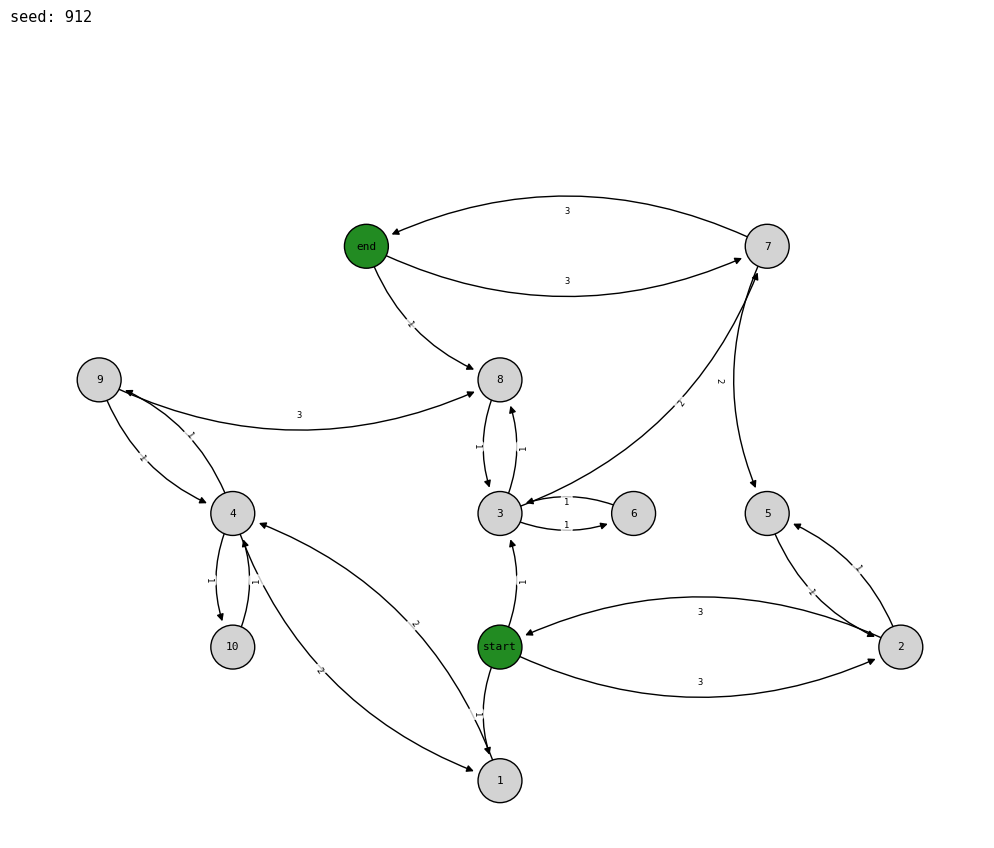

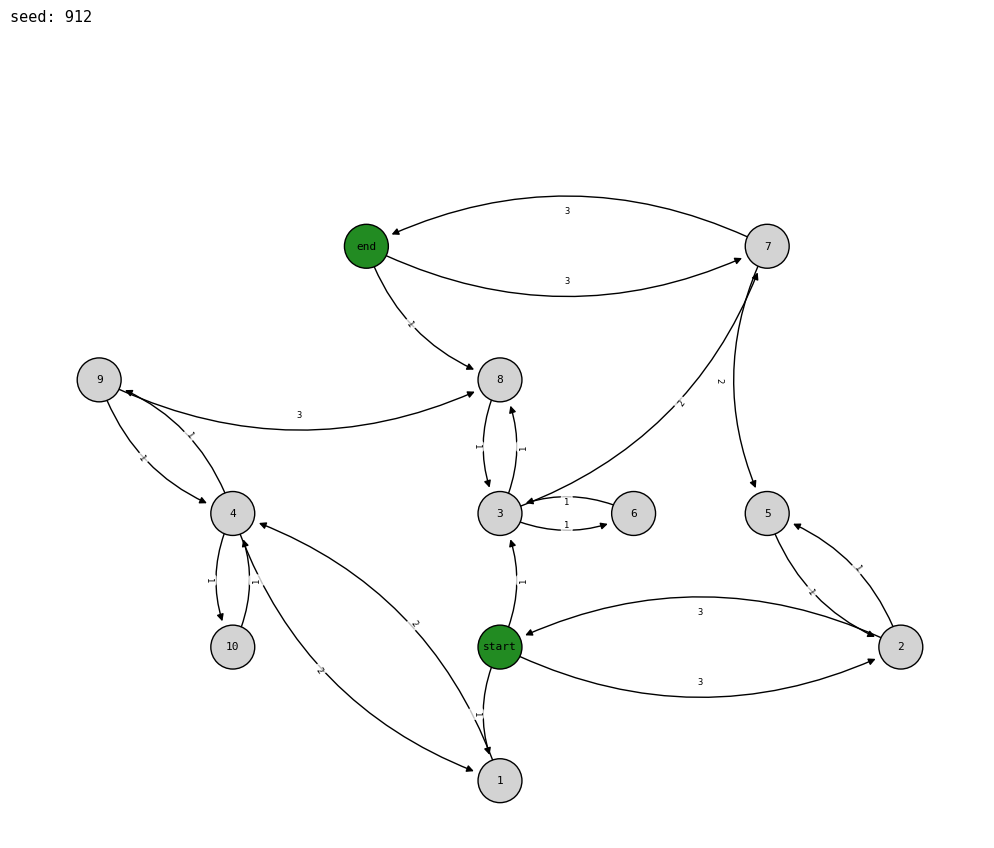

In [2]:
seed = 912
random.seed(seed)
k = 3
m = map(generate = k)
m._entities = {}
map_filename = "example_0"
m.draw(filename = "../maps/" + map_filename + ".png",
	seed = seed,
	figure_size = 10)

## add_entities

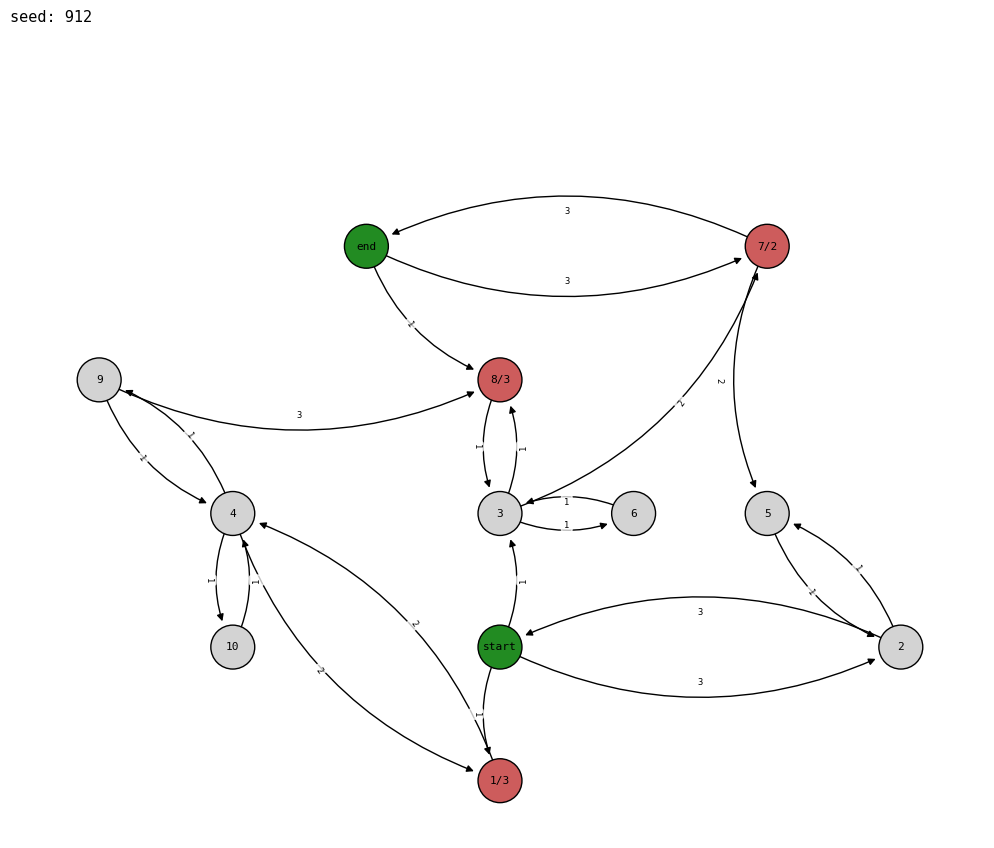

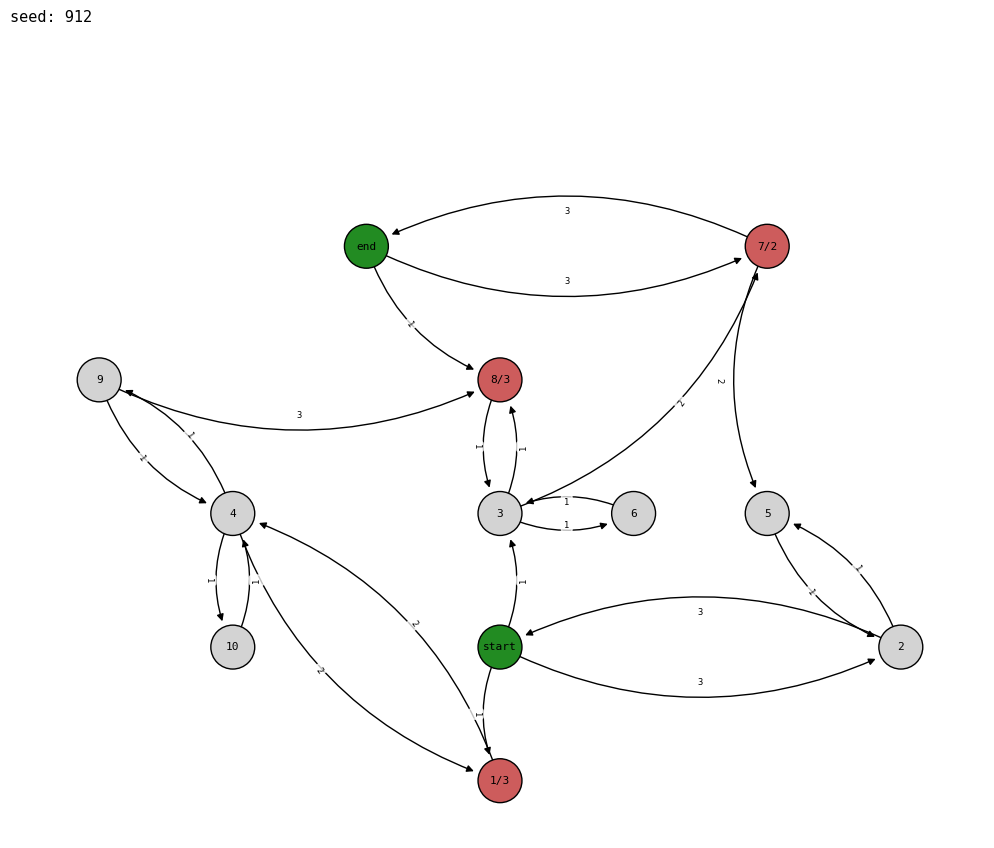

In [3]:
random.seed(seed)
m = map(generate = k)
map_filename = "example_1"
m.draw(filename = "../maps/" + map_filename + ".png",
    seed = seed,
	figure_size = 10)

## compute_stamina_life

In [4]:
random.seed(seed)
m = map(generate = k)
m._stamina_life

{2: (6, [0, 3, 7, 11]),
 5: (8, [0, 3, 8, 3, 7, 11]),
 8: (13, [0, 1, 4, 9, 8, 3, 7, 11])}

## get_parameters

In [5]:
gamemode_list = ["survivor", "balanced", "explorer"]
for g in gamemode_list:
	parameters = m.get_parameters(g)
	print("gamemode = " + str(g) + " -> (stamina, life) = (" + str(parameters[0]) + ", " + str(parameters[1]) + ")")

gamemode = survivor -> (stamina, life) = (2, 6)
gamemode = balanced -> (stamina, life) = (5, 8)
gamemode = explorer -> (stamina, life) = (8, 13)


## rl

1 1 

{2: (6, [0, 3, 7, 11]),
 5: (8, [0, 3, 8, 3, 7, 11]),
 8: (13, [0, 1, 4, 9, 8, 3, 7, 11])}

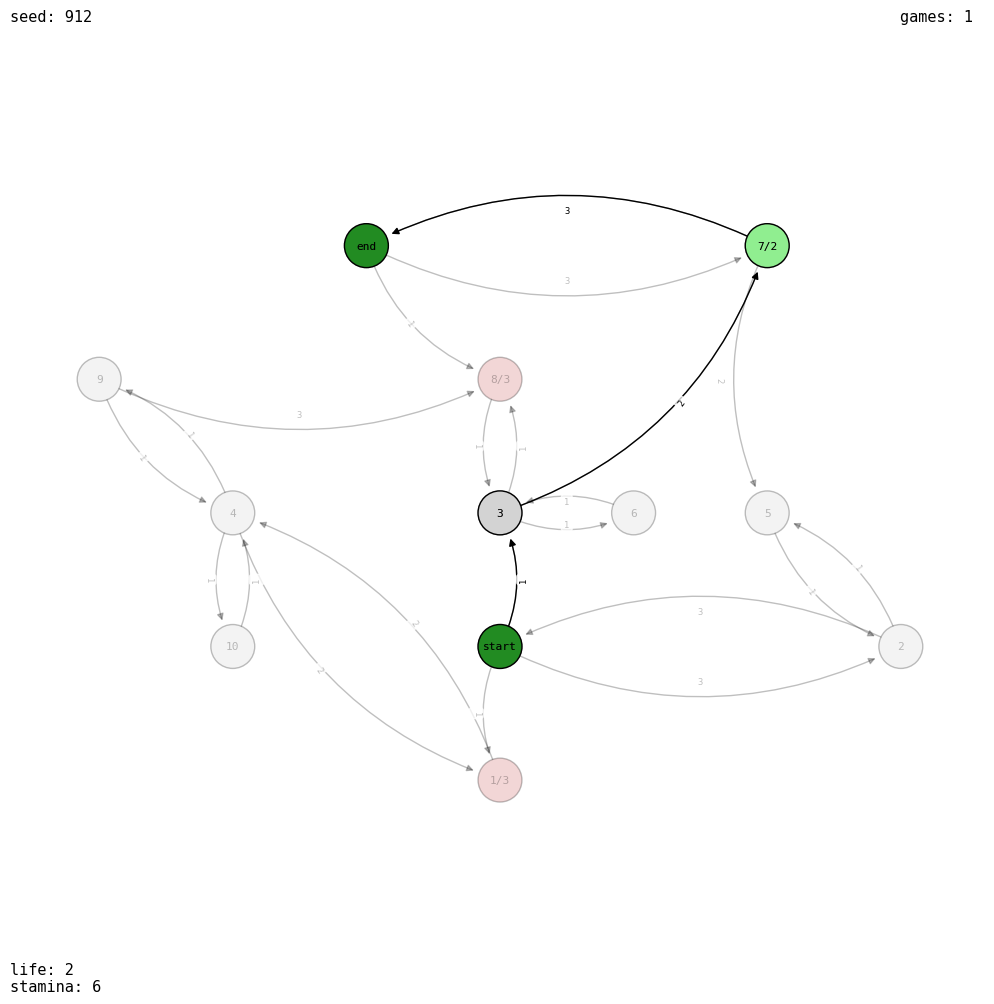

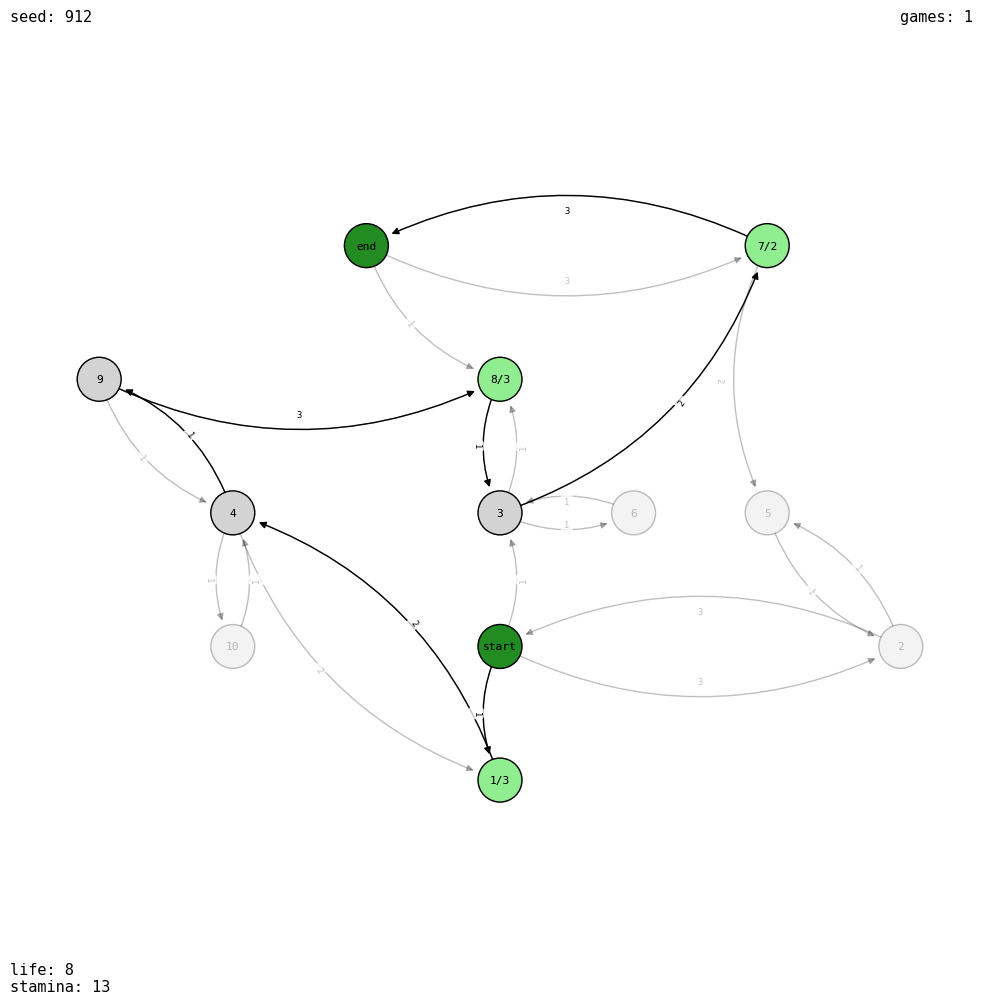

In [13]:
seed = 912
random.seed(seed)
k = 3
m = map(generate = k)
count = 2

for gamemode in ["survivor", "explorer"]:
	out = False
	n_iteration = 0
	while not(out) and n_iteration < 100:
		out = on_policy_first_visit_mc_control(m, gamemode)
		n_iteration += 1
		# debug
		print(str(n_iteration) + " ", end = "")
	if n_iteration < 100:
		stamina, life, path = out
		m.draw(filename = "../maps/example_" + str(count) + ".png",
			seed = seed, caption = [life, stamina, 1], path = path,
			figure_size = 10)
	else:
		print(gamemode + " -> path not found")
	count += 1

m._stamina_life

# Report

## Introduction graph

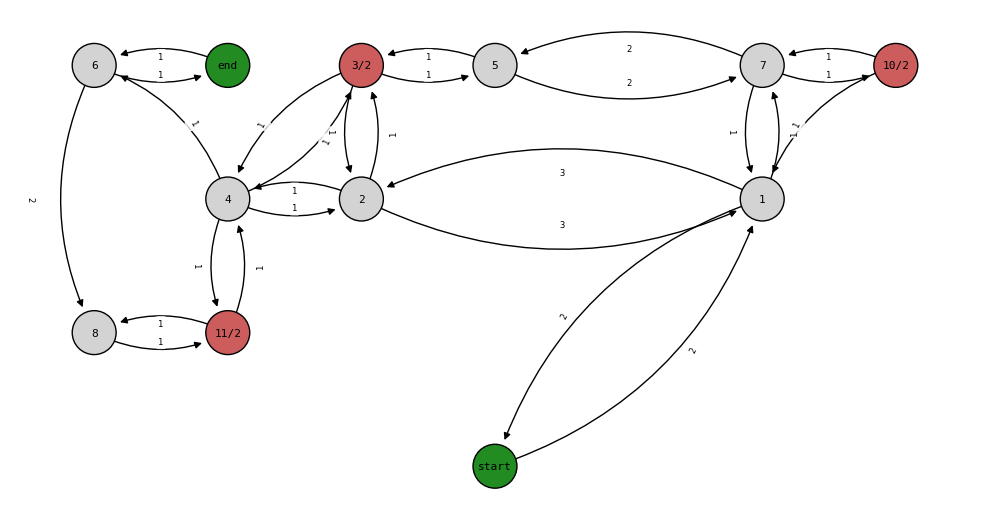

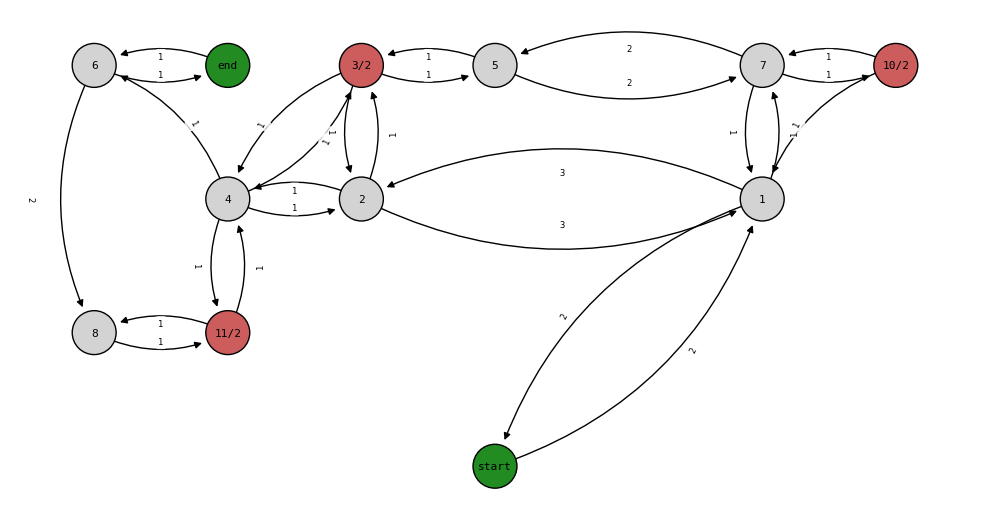

In [7]:
seed = 760
random.seed(seed)
k = 3
m = map(generate = k)
map_filename = "intro_0"
m.draw(filename = "../maps/" + map_filename + ".png",
	figure_size = 10)

## Termination of the generate function

In [4]:
max_bound = 7
av_k = np.zeros(max_bound - 1)
max_k = np.zeros(max_bound - 1)
for k in range(2, max_bound + 1):
	count = np.ones(1001, dtype = int)
	for seed in range(1001):
		random.seed(seed)
		m = map()
		# generate function
		flag = False
		while not(flag):
			m._coordinates = {}
			m._vertices = {}
			m._entities = {}
			flag = m._generate(k)
			if flag == False:
				if len(m._vertices) >= (k * 2 + 1) ** 2 // 5:
					count[seed] += 1
	av_k[k - 2] = np.average(count)
	max_k[k - 2] = max(count)

matplotlib.rcParams.update({
	"pgf.texsystem": "pdflatex",
	"font.family": "serif",
	"text.usetex": True,
	"pgf.rcfonts": False,
})
matplotlib.use("pdf")

fig = plt.figure(figsize = (6, 4.5))
plt.plot(range(2, max_bound + 1), av_k, color = "gray", linewidth = 1)
plt.plot(range(2, max_bound + 1), max_k, color = "gray", linewidth = 1)
plt.plot(range(2, max_bound + 1), av_k, ".r", markersize = 5, label = "average")
plt.plot(range(2, max_bound + 1), max_k, ".b", markersize = 5, label = "maximum")
plt.legend(loc = "upper left")
plt.xticks(range(2, max_bound + 1))
plt.xlabel(r"\texttt{bound}")
plt.ylabel("statistics on n. of attempts")
plt.savefig( "../plots/" + "generate_termination.pdf")

## Average number of entities

In [5]:
max_bound = 7
av = np.zeros(max_bound - 1)
for k in range(2, max_bound + 1):
	count_entities = np.ones(1001, dtype = int)
	for seed in range(1001):
		random.seed(seed)
		m = map()
		flag = False
		while not(flag):
			m._coordinates = {}
			m._vertices = {}
			m._entities = {}
			flag = m._generate(k)
		m._add_entities()
		count_entities[seed] = len(m._entities)
	av[k - 2] = np.average(count_entities)

for k in range(2, max_bound + 1):
	print("bound:", k, "/ min_vertex:", (2 * k + 1) ** 2 // 5, "/ max_vertex:", (2 * k + 1) ** 2 // 4, "/ min_entities:", ((2 * k + 1) ** 2 // 5) // 5 + 1, "/ max_entities:", ((2 * k + 1) ** 2 // 4) // 5 + 1)
	print("av_entities", av[k - 2], "\n")

bound: 2 / min_vertex: 5 / max_vertex: 6 / min_entities: 2 / max_entities: 2
av_entities 2.0 

bound: 3 / min_vertex: 9 / max_vertex: 12 / min_entities: 2 / max_entities: 3
av_entities 2.986013986013986 

bound: 4 / min_vertex: 16 / max_vertex: 20 / min_entities: 4 / max_entities: 5
av_entities 4.983016983016983 

bound: 5 / min_vertex: 24 / max_vertex: 30 / min_entities: 5 / max_entities: 7
av_entities 6.978021978021978 

bound: 6 / min_vertex: 33 / max_vertex: 42 / min_entities: 7 / max_entities: 9
av_entities 8.984015984015985 

bound: 7 / min_vertex: 45 / max_vertex: 56 / min_entities: 10 / max_entities: 12
av_entities 11.983016983016983 



## Plot score functions

In [6]:
matplotlib.rcParams.update({
	"pgf.texsystem": "pdflatex",
	"font.family": "serif",
	"text.usetex": True,
	"pgf.rcfonts": False,
})
matplotlib.use("pdf")

# reward_life
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.array([0, 8, 12])
y = np.array([100, 100, 0])
plt.axvline(x = 0, color = "gray", ls = "-", lw = 1)
plt.axvline(x = 8, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(x, ["0", r"\texttt{bl}", r"\texttt{l}"])
plt.xlabel(r"consumed life (\texttt{l} $-$ \texttt{cl})")
plt.ylabel(r"\texttt{reward\_life}$($\texttt{cl}$)$")
plt.savefig( "../plots/" + "reward_life.pdf")
plt.close()

# reward_experience
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.array([0, 8, 12])
y = np.array([0, 100, 100])
plt.axvline(x = 0, color = "gray", ls = "-", lw = 1)
plt.axvline(x = 8, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(x, ["0", r"\texttt{bl}", r"\texttt{l}"])
plt.xlabel(r"gained experience (\texttt{l} $-$ \texttt{cl})")
plt.ylabel(r"\texttt{reward\_experience}$($\texttt{cl}$)$")
plt.savefig( "../plots/" + "reward_experience.pdf")
plt.close()

# bonus_life
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.linspace(5, 11, num = 101)
y = 2 ** (4 - abs(x - 8)) / 2 ** 4 * 100
plt.axvline(x = 5, color = "indianred", ls = "--", lw = 1)
plt.axvline(x = 8, color = "indianred", ls = "--", lw = 1)
plt.axvline(x = 11, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(range(5, 12), [""] * 3 + [r"\texttt{bl}"] + [""] * 3)
plt.xlabel(r"consumed life (\texttt{l} $-$ \texttt{cl})")
plt.ylabel(r"\texttt{bonus\_life}$($\texttt{cl}$)$")
plt.savefig( "../plots/" + "bonus_life.pdf")
plt.close()

# reward_stamina
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.array([0, 13, 20])
y = np.array([100, 100, 0])
plt.axvline(x = 0, color = "gray", ls = "-", lw = 1)
plt.axvline(x = 13, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(x, ["0", r"\texttt{bs}", r"\texttt{s}"])
plt.xlabel(r"consumed stamina (\texttt{s} $-$ \texttt{cs})")
plt.ylabel(r"\texttt{reward\_stamina}$($\texttt{cs}$)$")
plt.savefig( "../plots/" + "reward_stamina.pdf")
plt.close()

# bonus_stamina
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.linspace(8, 18, num = 101)
y = 2 ** (6 - abs(x - 13)) / 2 ** 6 * 100
plt.axvline(x = 8, color = "indianred", ls = "--", lw = 1)
plt.axvline(x = 13, color = "indianred", ls = "--", lw = 1)
plt.axvline(x = 18, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(range(8, 19), [""] * 5 + [r"\texttt{bs}"] + [""] * 5)
plt.xlabel(r"consumed stamina (\texttt{s} $-$ \texttt{cs})")
plt.ylabel(r"\texttt{bonus\_stamina}$($\texttt{cs}$)$")
plt.savefig( "../plots/" + "bonus_stamina.pdf")
plt.close()

# bonus_games
fig = plt.figure(figsize = (3, 2.25), layout = "tight")
x = np.array([1, 2, 3, 4])
y = np.array([100, 75, 50, 25])
plt.axvline(x = 1, color = "indianred", ls = "--", lw = 1)
plt.axvline(x = 4, color = "indianred", ls = "--", lw = 1)
plt.axhline(y = 0, color = "gray", ls = "-", lw = 1)
plt.plot(x, y, color = "k")
plt.xticks(x)
plt.xlabel(r"number of played games (\texttt{cg})")
plt.ylabel(r"\texttt{bonus\_games}$($\texttt{cg}$)$")
plt.savefig( "../plots/" + "bonus_games.pdf")
plt.close()

## Cost of computation of stamina and life

In [7]:
max_bound = 6
iterations = 10
av_precomputations = np.zeros(max_bound - 1)
av_computations = np.zeros(max_bound - 1)
av_greedy = np.zeros(max_bound - 1)
av_entities = np.zeros(max_bound - 1)
for k in range(2, max_bound + 1):
	count_precomputations = np.ones(iterations, dtype = int)
	count_computations = np.ones(iterations, dtype = int)
	count_greedy = np.ones(iterations, dtype = int)
	count_entities = np.ones(iterations, dtype = int)
	for seed in range(iterations):
		random.seed(seed)
		m = map()
		flag = False
		while not(flag):
			m._coordinates = {}
			m._vertices = {}
			m._entities = {}
			flag = m._generate(k)
		m._add_entities()
		count_precomputations[seed], count_computations[seed], count_greedy[seed] = m._compute_stamina_life(verbose = True)
		count_entities[seed] = len(m._entities)
	av_precomputations[k - 2] = np.average(count_precomputations)
	av_computations[k - 2] = np.average(count_computations)
	av_greedy[k - 2] = np.average(count_greedy)
	av_entities[k - 2] = np.average(count_entities)

for k in range(2, max_bound + 1):
	print("bound:", k, "av_entities:", av_entities[k - 2])
	print("av_precomputations", av_precomputations[k - 2], "/ av_computations", av_computations[k - 2], "/ av_greedy", av_greedy[k - 2], "\n")

bound: 2 av_entities: 2.0
av_precomputations 7.0 / av_computations 4.5 / av_greedy 9.4 

bound: 3 av_entities: 3.0
av_precomputations 13.0 / av_computations 14.8 / av_greedy 39.6 

bound: 4 av_entities: 4.9
av_precomputations 30.0 / av_computations 125.9 / av_greedy 1028.7 

bound: 5 av_entities: 7.0
av_precomputations 57.0 / av_computations 683.4 / av_greedy 42844.6 

bound: 6 av_entities: 9.0
av_precomputations 91.0 / av_computations 4296.9 / av_greedy 3370489.8 

